In [257]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
housing_data=pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [259]:
housing_data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [260]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [261]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [262]:
housing_data.describe(include=(np.object))

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [263]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#  By Filling the null values

In [264]:
housing_mean=housing_data.fillna(housing_data['total_bedrooms'].mean())

In [265]:
housing_mean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [266]:
housing_data['total_bedrooms'].mean()

537.8705525375618

In [267]:
housing_data['total_bedrooms'].min()

1.0

## Data Visualization

In [268]:
housing_mean.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [269]:
multi=housing_mean.corr()

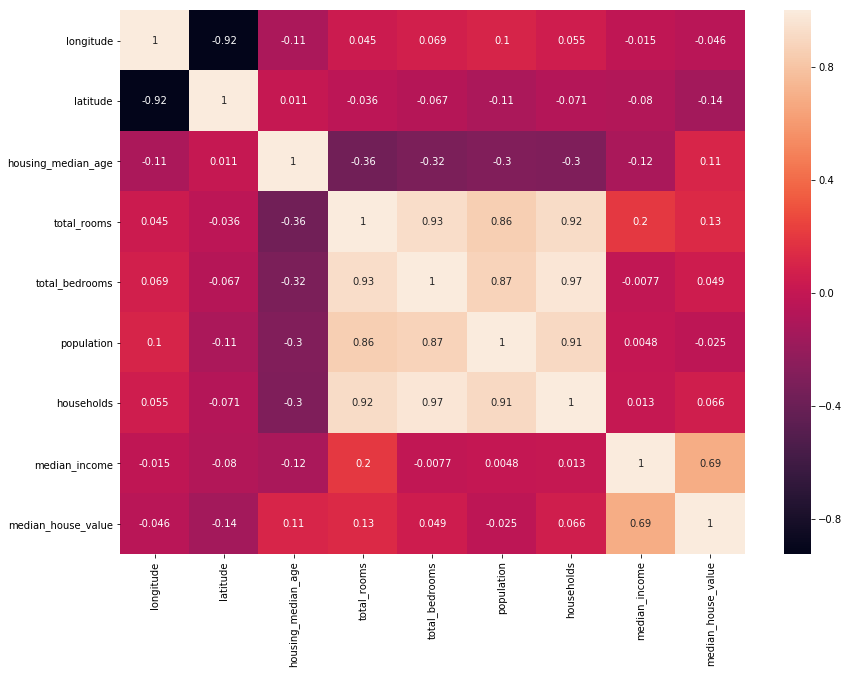

In [270]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(14,10))
sns.heatmap(multi,annot=True)
plt.savefig('heatmap.png')

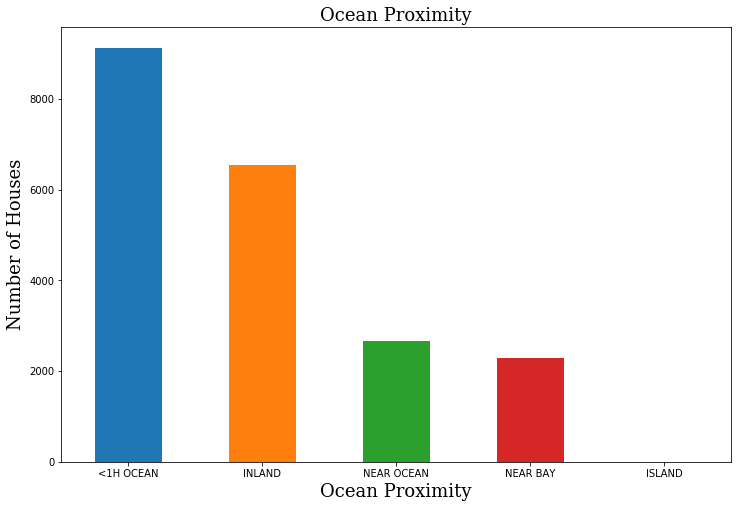

In [271]:
font_dict = {
    'family': 'serif',
    'size': 18
}
plt.figure(figsize=(12,8))
ocean_visualization=housing_data['ocean_proximity'].value_counts()
ocean_visualization.plot.bar()
plt.xlabel('Ocean Proximity', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Number of Houses', fontdict=font_dict)
plt.title('Ocean Proximity', fontdict=font_dict)
plt.savefig('OceanHouses.png')
plt.show()

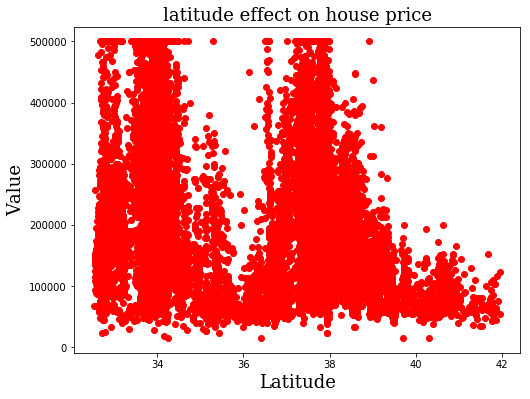

In [272]:
plt.figure(figsize=(8,6))
plt.scatter(housing_mean['latitude'],housing_mean['median_house_value'],color='red')
plt.xlabel('Latitude', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('Value', fontdict=font_dict)
plt.title('latitude effect on house price', fontdict=font_dict)
plt.savefig('latitude-price.png')
plt.show()

In [273]:
housing_mean.columns
colname=['housing_median_age', 'total_rooms',
       'total_bedrooms', 'households', 'median_income',
       'median_house_value']

C:\Users\Rahul jadli\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

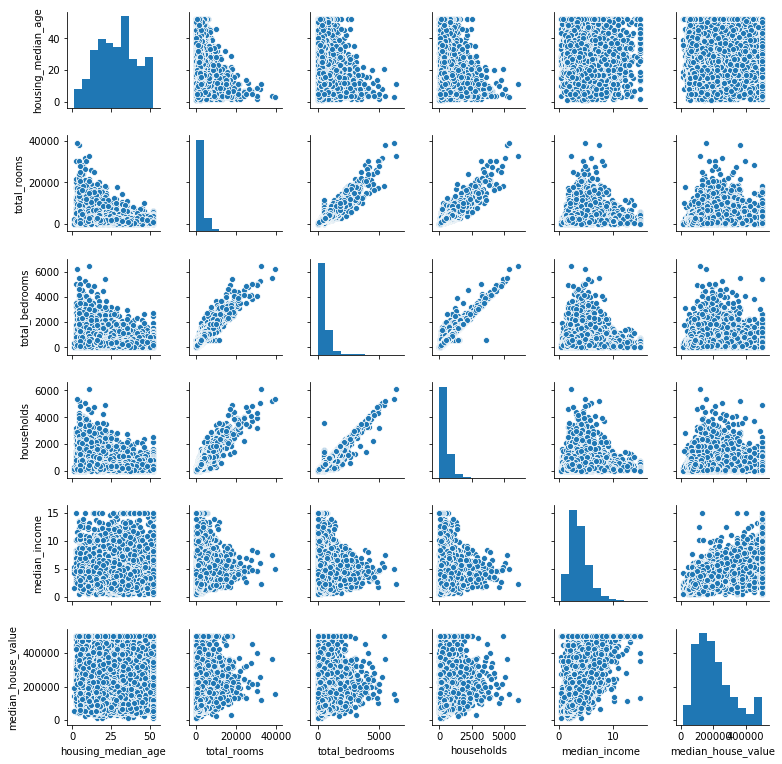

In [274]:
plt.figure(figsize=(20,10))
sns.pairplot(housing_mean[colname],size=1.8)
plt.show()

In [275]:
ocean_groupby=housing_data.groupby(['ocean_proximity'])['median_house_value'].mean()
ocean_groupby.head()

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

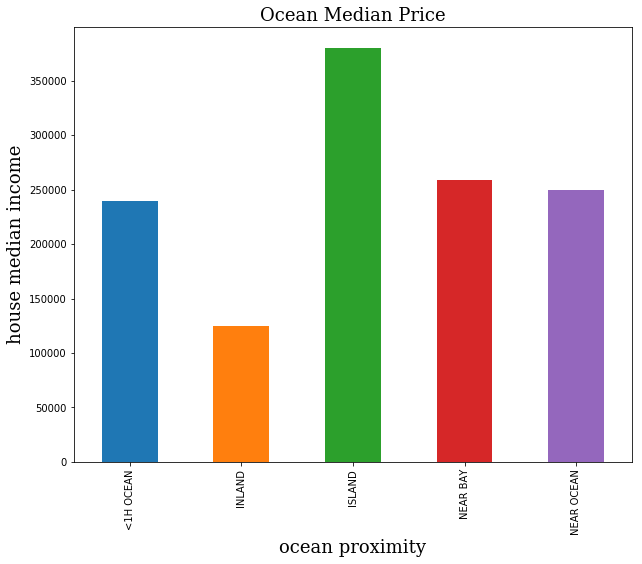

In [276]:
plt.figure(figsize=(10,8))
ocean_groupby.plot.bar()
plt.xlabel('ocean proximity',fontdict=font_dict)
plt.ylabel('house median income',fontdict=font_dict)
plt.title('Ocean Median Price',fontdict=font_dict)
plt.savefig('ocean-effect-on-median-value.png')
plt.show()

In [277]:
housing_mean.describe(include=(np.object))

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


### Converting categorical data into continouse 
## We are using get_dummies you can also use hot encoding

In [278]:
location=pd.get_dummies(housing_mean['ocean_proximity'],drop_first=1)
location.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [279]:
housing_mean=pd.concat([housing_mean,location],axis=1)
housing_mean.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0,0,1,0


In [280]:
housing_mean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [281]:
X=housing_mean.drop(['ocean_proximity','median_house_value'],axis=1)
Y=housing_mean['median_house_value']
X.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,1,0


## Making Training and Testing Data

In [282]:
 x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


### Using Linear Regression and Training it

In [283]:
model=LinearRegression()

In [284]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [285]:
prediction=model.predict(x_test)
prediction

array([ 65985.63662164, 134175.68197035, 261345.35152614, ...,
       111000.6600915 , 125063.4139512 , 223103.92162435])

### Using RMSE to find the root mean square error.

In [286]:
from sklearn.metrics import mean_squared_error

In [287]:
rmse = np.sqrt(mean_squared_error(prediction, y_test))
rmse

69140.00903476427

In [288]:
y_test.head()

20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64

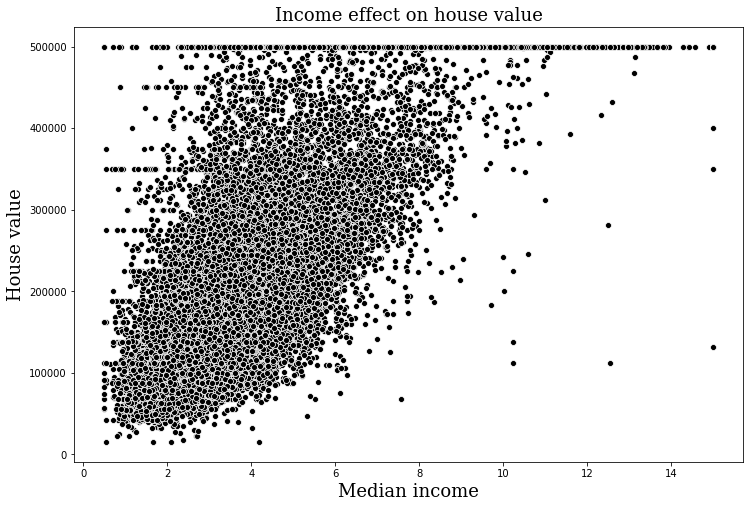

In [289]:
plt.figure(figsize=(12,8))
sns.scatterplot(housing_mean['median_income'],housing_mean['median_house_value'],color='black')
plt.xlabel('Median income', fontdict=font_dict)
plt.xticks(rotation=0)
plt.ylabel('House value', fontdict=font_dict)
plt.title('Income effect on house value', fontdict=font_dict)
plt.savefig('Income-effect-on-house-value.png')
plt.show()

# By Not Filling the Null Values

In [303]:
approach2=housing_data.copy()
# approach2=housing_data.drop(['ocean_proximity'], axis=1, inplace=True)
approach2=pd.concat([approach2,location],axis=1)
approach2=approach2.dropna(axis=0)
approach2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0,0,1,0


In [304]:
Xa=approach2.drop(['median_house_value','ocean_proximity'],axis=1)
Ya=approach2['median_house_value']

In [305]:
Xa.total_bedrooms.isnull().sum()

0

In [306]:
Xa=Xa.dropna(axis=0)

In [307]:
Xa.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
INLAND                False
ISLAND                False
NEAR BAY              False
NEAR OCEAN            False
dtype: bool

In [308]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(Xa, Ya, test_size=0.33, random_state=42)

In [309]:
model1=LinearRegression()

In [310]:
model1.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [311]:
prediction1=model1.predict(x_test1)
prediction1

array([203005.8671304 , 147149.34762357, 209185.26528192, ...,
       215223.06743802, 117146.45687116, 291577.66733353])

In [312]:
rmse1 = np.sqrt(mean_squared_error(prediction1, y_test1))
rmse1

67488.285714908